# Generative models

#Diego Armando Pérez Rosero

In [ ]:
!pip uninstall -y tensorflow tf-keras

# Install TensorFlow 2.16
!pip install tensorflow==2.16.1

# Restart the runtime (manually or using the following command)
#import os
#os._exit(00)


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)


In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Graficar imágenes:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# PCA como un autoencoder lineal

In [ ]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Definir autoencoder:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=64)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3963
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.1825
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0776
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0395
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0275
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0218
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0182
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0153
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0132
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0115
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0103
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0094
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0087
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0082
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0078
Epoch 16/100
1/1 ━

In [ ]:
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


Saving figure linear_autoencoder_pca_plot


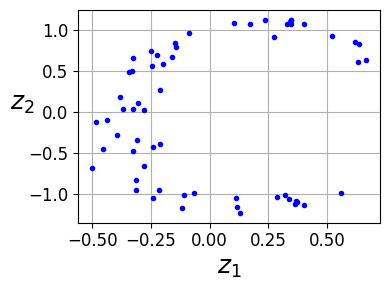

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()

# Stacked (Deep) Autoencoders

Utilizando MNIST:

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Stacked Autoencoder con 3 hidden layers y 1 output layer.

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn



In [ ]:
piecewise_constant_fn = piecewise_constant([40, 18], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="huber",# cada pixel como probailidad de membresia, por eso se usa cross entropy, converge mas rapido
                   optimizer='adam', metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=50,
                         validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0259 - rounded_accuracy: 0.8643 - val_loss: 0.0070 - val_rounded_accuracy: 0.9353 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0048 - rounded_accuracy: 0.9501 - val_loss: 0.0043 - val_rounded_accuracy: 0.9515 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035 - rounded_accuracy: 0.9586 - val_loss: 0.0033 - val_rounded_accuracy: 0.9588 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - rounded_accuracy: 0.9629 - val_loss: 0.0029 - val_rounded_accuracy: 0.9626 - learning_rate: 0.0010
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - rounded_accuracy: 0.9656 - val_loss: 0.0026 - val_rounded_accuracy: 0.9648 - learning_rate: 0.0010
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023 - rounded_accuracy: 0.9674 - val_loss: 0.0024 - val_rounded_accuracy: 0.9663 - learning_rate

Graficar reconstrucciones:

In [ ]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
Saving figure reconstruction_plot


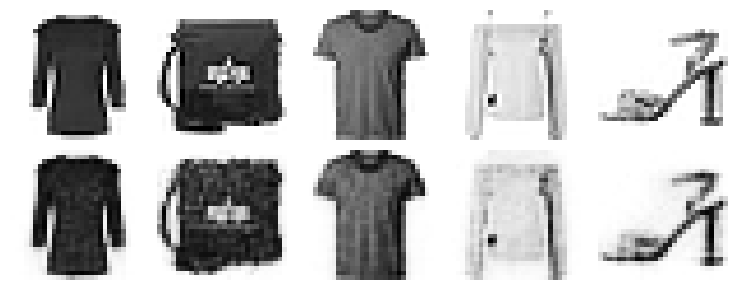

In [ ]:
show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

# Visualizando Fashion MNIST con tsne desde espacio latente del encoder

In [ ]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min()) #normalizar rango dinamico

157/157 [==============================] - 0s 1ms/step


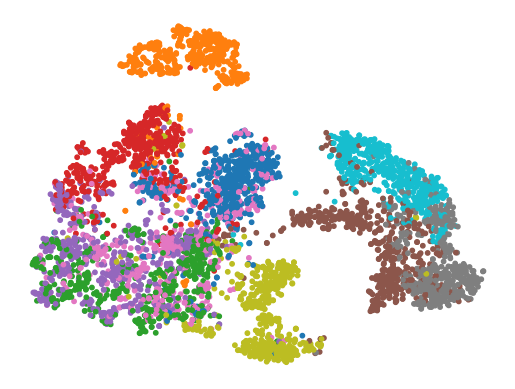

In [ ]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


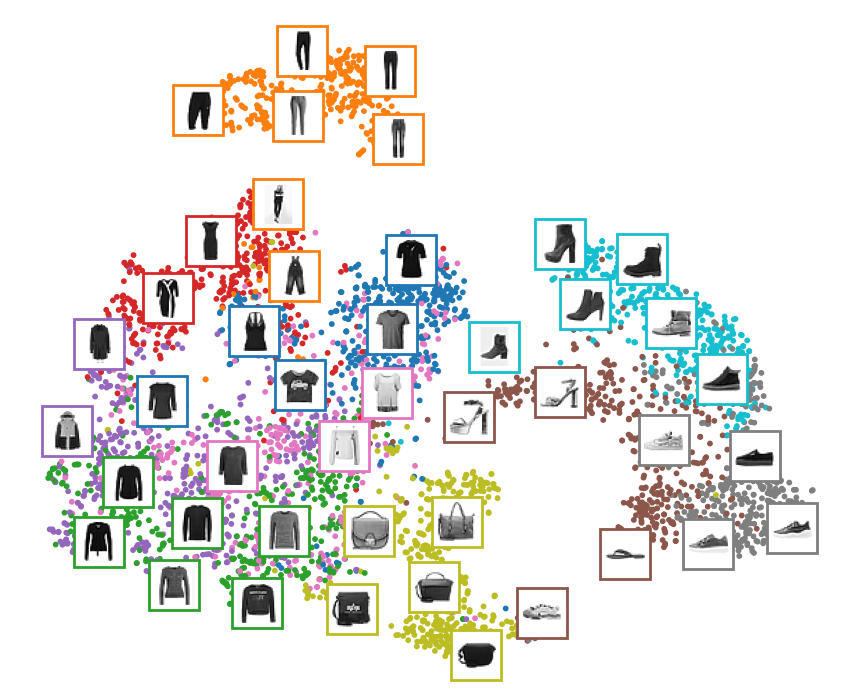

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.01: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

## Tying weights (relacionadar pesos  en encoder y decoder)

Se fijan los pesos del decoder como la transpuesta de los pesos del encoder (relacón directa con pca como reconstructor).

In [ ]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=[self.dense.input_shape[-1]],
                                      initializer="zeros")
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(512, activation="selu")
dense_2 = keras.layers.Dense(256, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="huber",
                optimizer='adam', metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=50,
                      validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 2s 5ms/step - loss: 0.0145 - rounded_accuracy: 0.9071 - val_loss: 0.0051 - val_rounded_accuracy: 0.9494 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0042 - rounded_accuracy: 0.9548 - val_loss: 0.0038 - val_rounded_accuracy: 0.9552 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0032 - rounded_accuracy: 0.9614 - val_loss: 0.0030 - val_rounded_accuracy: 0.9630 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 1s 7ms/step - loss: 0.0028 - rounded_accuracy: 0.9648 - val_loss: 0.0026 - val_rounded_accuracy: 0.9659 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0025 - rounded_accuracy: 0.9672 - val_loss: 0.0025 - val_rounded_accuracy: 0.9681 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0023 - rounded_accuracy: 0.9686 - val_loss: 0.0022 - val_rounded_accu

1/1 [==============================] - 0s 65ms/step


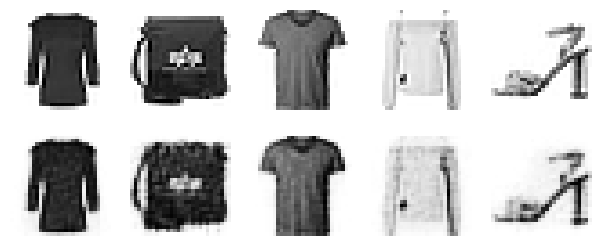

In [ ]:
show_reconstructions(tied_ae)
plt.show()

## Training one Autoencoder at a Time

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=25, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid),batch_size=256)
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    512, X_train_flat, X_valid_flat, "huber",'adam', output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    512, X_train_enc1, X_valid_enc1, "huber", 'adam',
    output_activation="selu")

Epoch 1/25
215/215 [==============================] - 2s 7ms/step - loss: 0.0133 - rounded_accuracy: 0.9081 - val_loss: 0.0064 - val_rounded_accuracy: 0.9413
Epoch 2/25
215/215 [==============================] - 1s 4ms/step - loss: 0.0050 - rounded_accuracy: 0.9500 - val_loss: 0.0042 - val_rounded_accuracy: 0.9557
Epoch 3/25
215/215 [==============================] - 1s 4ms/step - loss: 0.0036 - rounded_accuracy: 0.9597 - val_loss: 0.0032 - val_rounded_accuracy: 0.9627
Epoch 4/25
215/215 [==============================] - 1s 4ms/step - loss: 0.0028 - rounded_accuracy: 0.9653 - val_loss: 0.0026 - val_rounded_accuracy: 0.9670
Epoch 5/25
215/215 [==============================] - 1s 4ms/step - loss: 0.0023 - rounded_accuracy: 0.9691 - val_loss: 0.0022 - val_rounded_accuracy: 0.9703
Epoch 6/25
215/215 [==============================] - 1s 4ms/step - loss: 0.0020 - rounded_accuracy: 0.9719 - val_loss: 0.0019 - val_rounded_accuracy: 0.9722
Epoch 7/25
215/215 [==============================] 

In [ ]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

1/1 [==============================] - 0s 97ms/step


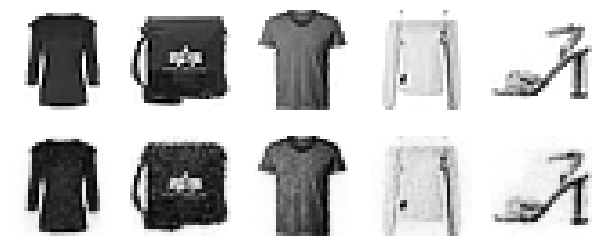

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
piecewise_constant_fn = piecewise_constant([45, 18], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
stacked_ae_1_by_1.compile(loss="huber",
                          optimizer='adam', metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=50,
                                validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 2s 6ms/step - loss: 0.0014 - rounded_accuracy: 0.9790 - val_loss: 9.3166e-04 - val_rounded_accuracy: 0.9827 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 1s 5ms/step - loss: 9.1217e-04 - rounded_accuracy: 0.9823 - val_loss: 9.4023e-04 - val_rounded_accuracy: 0.9819 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 1s 5ms/step - loss: 9.0581e-04 - rounded_accuracy: 0.9822 - val_loss: 9.2691e-04 - val_rounded_accuracy: 0.9825 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 1s 5ms/step - loss: 8.8009e-04 - rounded_accuracy: 0.9825 - val_loss: 9.1484e-04 - val_rounded_accuracy: 0.9823 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 1s 4ms/step - loss: 8.7286e-04 - rounded_accuracy: 0.9825 - val_loss: 8.9743e-04 - val_rounded_accuracy: 0.9827 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 8.6640e-04 - rounded_accuracy: 0.98

1/1 [==============================] - 0s 67ms/step


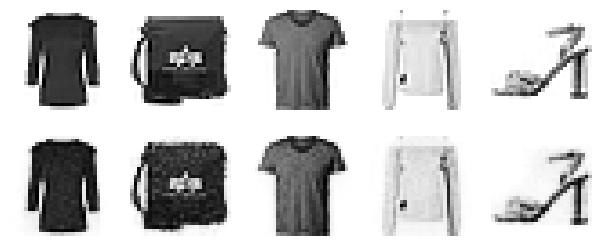

In [ ]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

## Autoencoders con CNNs

Nota: Para el decoder se debe incluir la operación de deconvolución o convolución transpuesta

![cnn](https://i.stack.imgur.com/YyCu2.gif)

![tcnn](https://i.stack.imgur.com/f2RiP.gif)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),

    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    #keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    #keras.layers.BatchNormalization(),
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding="Valid", activation="selu",
                                 input_shape=[3, 3, 128]),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    #keras.layers.BatchNormalization(),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])
piecewise_constant_fn = piecewise_constant([46, 18], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
conv_ae.compile(loss="huber", optimizer='adam',
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=50,
                      validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 9s 19ms/step - loss: 0.0119 - rounded_accuracy: 0.9184 - val_loss: 0.0103 - val_rounded_accuracy: 0.9273 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 3s 12ms/step - loss: 0.0050 - rounded_accuracy: 0.9475 - val_loss: 0.0049 - val_rounded_accuracy: 0.9487 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 3s 12ms/step - loss: 0.0039 - rounded_accuracy: 0.9545 - val_loss: 0.0037 - val_rounded_accuracy: 0.9562 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 3s 13ms/step - loss: 0.0033 - rounded_accuracy: 0.9583 - val_loss: 0.0032 - val_rounded_accuracy: 0.9581 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 3s 14ms/step - loss: 0.0029 - rounded_accuracy: 0.9610 - val_loss: 0.0029 - val_rounded_accuracy: 0.9610 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 3s 12ms/step - loss: 0.0027 - rounded_accuracy: 0.9628 - val_loss: 0.0026 - val_rounde

In [ ]:
conv_decoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 7, 7, 64)          73792     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 14, 14, 32)        18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 1)         289       
 Transpose)                                                      
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 92545 (361.50 KB)
Trainable params: 92545 (361.50 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 7, 7, 64)        

1/1 [==============================] - 0s 394ms/step


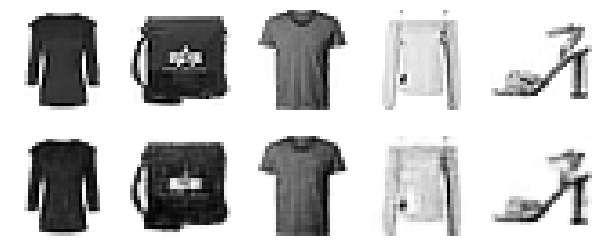

In [ ]:
show_reconstructions(conv_ae)
plt.show()

# Stacked denoising Autoencoder

Se busca regularizar mediante ruido, generalmente Gaussiano, o aplicando dropout

Utilizando ruido Gaussiano:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

piecewise_constant_fn = piecewise_constant([90, 30], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.09), #std
    keras.layers.Dense(512, activation="gelu"),
    keras.layers.Dense(256, activation="gelu"),
    keras.layers.BatchNormalization(),
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(512, activation="gelu", input_shape=[256]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="huber", optimizer='adam',
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=130,
                           validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/130
215/215 [==============================] - 4s 6ms/step - loss: 0.0121 - rounded_accuracy: 0.9130 - val_loss: 0.0088 - val_rounded_accuracy: 0.9371 - lr: 0.0010
Epoch 2/130
215/215 [==============================] - 1s 6ms/step - loss: 0.0057 - rounded_accuracy: 0.9434 - val_loss: 0.0053 - val_rounded_accuracy: 0.9466 - lr: 0.0010
Epoch 3/130
215/215 [==============================] - 1s 5ms/step - loss: 0.0045 - rounded_accuracy: 0.9501 - val_loss: 0.0044 - val_rounded_accuracy: 0.9534 - lr: 0.0010
Epoch 4/130
215/215 [==============================] - 1s 5ms/step - loss: 0.0040 - rounded_accuracy: 0.9539 - val_loss: 0.0038 - val_rounded_accuracy: 0.9562 - lr: 0.0010
Epoch 5/130
215/215 [==============================] - 1s 6ms/step - loss: 0.0036 - rounded_accuracy: 0.9561 - val_loss: 0.0033 - val_rounded_accuracy: 0.9600 - lr: 0.0010
Epoch 6/130
215/215 [==============================] - 1s 6ms/step - loss: 0.0033 - rounded_accuracy: 0.9580 - val_loss: 0.0030 - val_rounde

1/1 [==============================] - 0s 115ms/step


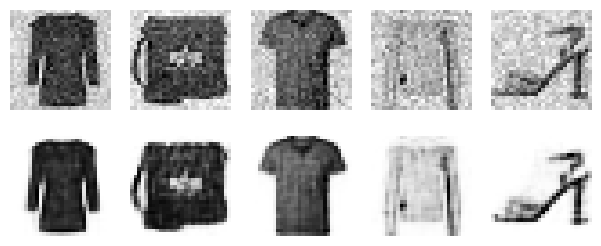

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.09)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

Con dropout:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
piecewise_constant_fn = piecewise_constant([90, 30], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),

])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=[256]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="huber", optimizer='adam',
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=130,
                         validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/130
215/215 [==============================] - 3s 6ms/step - loss: 0.0182 - rounded_accuracy: 0.8761 - val_loss: 0.0101 - val_rounded_accuracy: 0.9196 - lr: 0.0010
Epoch 2/130
215/215 [==============================] - 1s 4ms/step - loss: 0.0090 - rounded_accuracy: 0.9238 - val_loss: 0.0075 - val_rounded_accuracy: 0.9345 - lr: 0.0010
Epoch 3/130
215/215 [==============================] - 1s 4ms/step - loss: 0.0073 - rounded_accuracy: 0.9332 - val_loss: 0.0062 - val_rounded_accuracy: 0.9414 - lr: 0.0010
Epoch 4/130
215/215 [==============================] - 1s 4ms/step - loss: 0.0067 - rounded_accuracy: 0.9365 - val_loss: 0.0057 - val_rounded_accuracy: 0.9439 - lr: 0.0010
Epoch 5/130
215/215 [==============================] - 1s 5ms/step - loss: 0.0062 - rounded_accuracy: 0.9396 - val_loss: 0.0052 - val_rounded_accuracy: 0.9468 - lr: 0.0010
Epoch 6/130
215/215 [==============================] - 1s 6ms/step - loss: 0.0059 - rounded_accuracy: 0.9411 - val_loss: 0.0051 - val_rounde

1/1 [==============================] - 0s 69ms/step
Saving figure dropout_denoising_plot


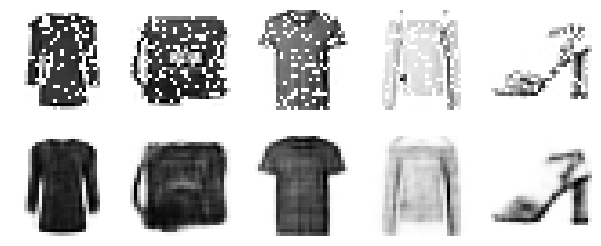

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.2)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)

# Sparse Autoencoder

- Busca disminuir la cantidad de neuranas activas en el encoder.
- Se usa una sigmoid en el encoder con regularización l1
- Otras alternativas incluyen el mse con l1 y l2, o incluso la Divergencia KL sobre las activaciones de las neuronas para regularizar (sparse).

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

piecewise_constant_fn = piecewise_constant([45, 30], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.Dense(256, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(512, activation="selu", input_shape=[256]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="huber", optimizer='adam',
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=50,
                        validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 2s 5ms/step - loss: 0.0163 - rounded_accuracy: 0.8888 - val_loss: 0.0097 - val_rounded_accuracy: 0.9219 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0081 - rounded_accuracy: 0.9310 - val_loss: 0.0070 - val_rounded_accuracy: 0.9368 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0063 - rounded_accuracy: 0.9410 - val_loss: 0.0058 - val_rounded_accuracy: 0.9441 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0053 - rounded_accuracy: 0.9464 - val_loss: 0.0051 - val_rounded_accuracy: 0.9478 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 1s 6ms/step - loss: 0.0047 - rounded_accuracy: 0.9502 - val_loss: 0.0046 - val_rounded_accuracy: 0.9519 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0043 - rounded_accuracy: 0.9532 - val_loss: 0.0041 - val_rounded_accu

1/1 [==============================] - 0s 62ms/step


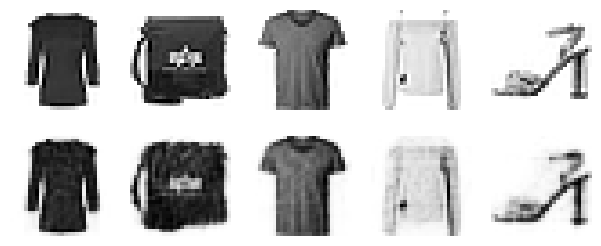

In [ ]:
show_reconstructions(simple_ae)
plt.show()

Cálculo de histogramas para revisar la frecuencia de activación:

In [ ]:
def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths*0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, position: "{}%".format(int(np.round(100 * y)))))
    ax.grid(True)

In [ ]:
def plot_activations_histogram(encoder, height=1, n_bins=10):
    X_valid_codings = encoder(X_valid).numpy()
    activation_means = X_valid_codings.mean(axis=0)
    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, X_valid_codings.ravel(), bins)
    ax1.plot([mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean))
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

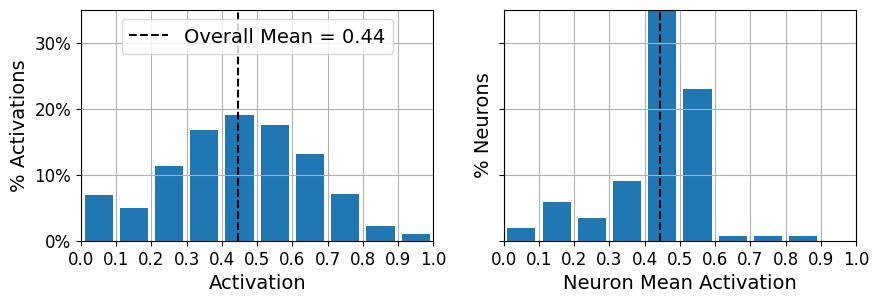

In [ ]:
plot_activations_histogram(simple_encoder, height=0.35)
plt.show()

Con regularización l1:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


piecewise_constant_fn = piecewise_constant([45, 30], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.Dense(256, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.L1L2())#,
    #keras.layers.ActivityRegularization(l2=1e-1)  # Alternatively, you could add
                                                  # activity_regularizer=keras.regularizers.l1(1e-3)
                                                  # to the previous layer.
])
sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(512, activation="selu", input_shape=[256]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="huber", optimizer='adam',
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=50,
                           validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 2s 6ms/step - loss: 0.0166 - rounded_accuracy: 0.8876 - val_loss: 0.0099 - val_rounded_accuracy: 0.9198 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0081 - rounded_accuracy: 0.9308 - val_loss: 0.0070 - val_rounded_accuracy: 0.9378 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0063 - rounded_accuracy: 0.9412 - val_loss: 0.0058 - val_rounded_accuracy: 0.9444 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0053 - rounded_accuracy: 0.9465 - val_loss: 0.0050 - val_rounded_accuracy: 0.9484 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 1s 4ms/step - loss: 0.0047 - rounded_accuracy: 0.9503 - val_loss: 0.0045 - val_rounded_accuracy: 0.9522 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0043 - rounded_accuracy: 0.9532 - val_loss: 0.0042 - val_rounded_accu

1/1 [==============================] - 0s 91ms/step


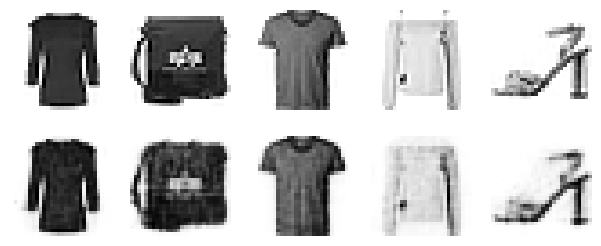

In [ ]:
show_reconstructions(sparse_l1_ae)

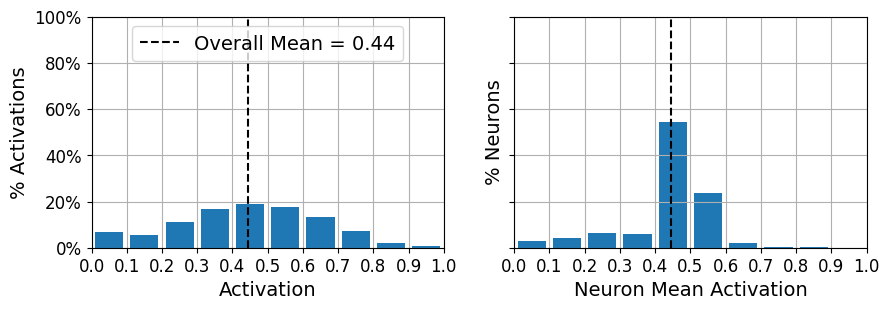

In [ ]:
plot_activations_histogram(sparse_l1_encoder, height=1.)
plt.show()

Aplicar la divergencia KL para asegurar un 10% de sparsity

Saving figure sparsity_loss_plot


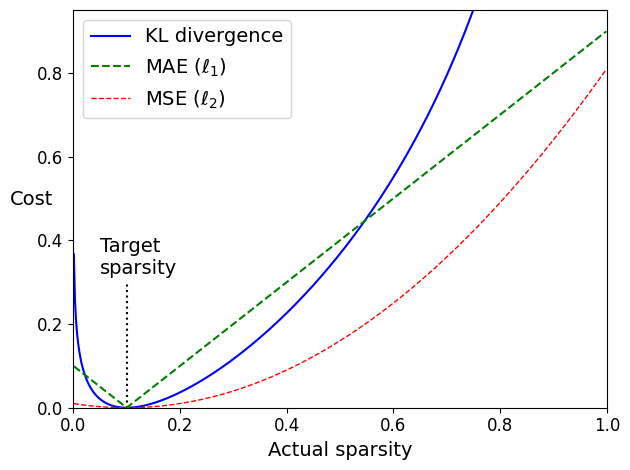

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
save_fig("sparsity_loss_plot")

In [ ]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

piecewise_constant_fn = piecewise_constant([45, 30], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(512, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(512, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="huber", optimizer='adam',
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=50,
                           validation_data=(X_valid, X_valid),callbacks=[lr_scheduler],batch_size=256)

Epoch 1/50
215/215 [==============================] - 4s 6ms/step - loss: 0.0189 - rounded_accuracy: 0.8784 - val_loss: 0.0106 - val_rounded_accuracy: 0.9181 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0091 - rounded_accuracy: 0.9255 - val_loss: 0.0080 - val_rounded_accuracy: 0.9315 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0072 - rounded_accuracy: 0.9355 - val_loss: 0.0066 - val_rounded_accuracy: 0.9387 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0061 - rounded_accuracy: 0.9414 - val_loss: 0.0058 - val_rounded_accuracy: 0.9432 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0055 - rounded_accuracy: 0.9453 - val_loss: 0.0053 - val_rounded_accuracy: 0.9466 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 0.0050 - rounded_accuracy: 0.9483 - val_loss: 0.0049 - val_rounded_accu

1/1 [==============================] - 0s 133ms/step


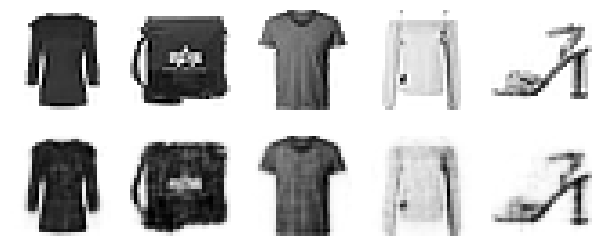

In [ ]:
show_reconstructions(sparse_kl_ae)

Saving figure sparse_autoencoder_plot


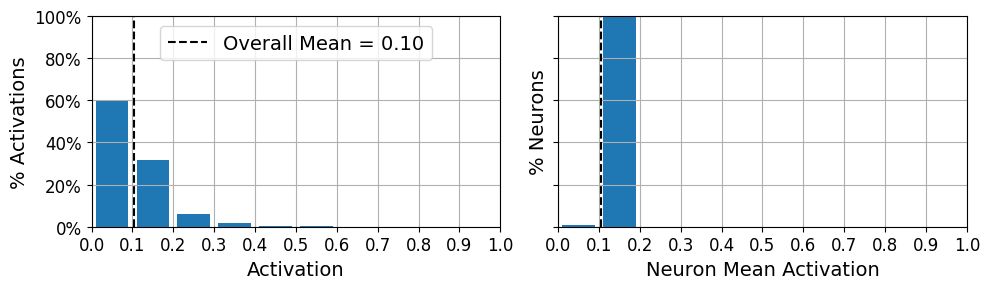

In [ ]:
plot_activations_histogram(sparse_kl_encoder)
save_fig("sparse_autoencoder_plot")
plt.show()

# [Variational Autoencoder](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)



Traditional Autoencoders deconstruct input data into a latent representation, and then using this latent space they reconstruct the original data. During this process, the Neural Network discovers which features are the most important for the reconstruction process and which ones can be ignored.
<div>
<img src=https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-31756-0_4/MediaObjects/480626_1_En_4_Fig2_HTML.png>
</div>

However, there are issues associated with the Latent Space: This latent space is not necesarily continuous between classes, and as such if a new data point lands in between classes, the network won't be able to handle it and will produce a garbage output.
<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*xCjoga9IPyNUSiz9E7ao7A.png>
</div>

To solve this issue, Variational Autoencoders (VAE) try to force the latent space to a known probability distribution

The encoder normally produces a latent space, but in a VAE, the encoder produces a latent distribution $q(z|x)$, we then sample this distribution to create our latent space and reconstruct as normal.

<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*ejNnusxYrn1NRDZf4Kg2lw@2x.png" style="background-color:white;"/>
</div>




This latent distribution is compared to our posterior distribution $p(z|x)$ and through the cost function the goal is to minimize the difference between them.
$$q(z|x) ≈ p(z|x)$$

There is one big issue with this approach, thanks to Bayes' Theorem we know
$$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$$
Where $p(x|z)$ is our reconstruction likelihood

$p(z)$ is our prior known distribution

and $p(x)$ is the evidence

Calculating the evidence turns out to be imposible due to the intractable nature of the evidence.
$$p(x) = ∫p(x|z)p(z)dz$$

At some point we need to find a way to estimate this evidence. Let's take a step back however, and get as far as we can calculating $q(z|x) ≈ p(z|x)$. We know the Kullback-Leibler divergence acts as a pseudo-distance for probability density functions, so we can use it to estimate the difference between $q$ and $p$

$$D_{kl}(q||p) = 𝔼_q\{log\begin{pmatrix}\frac{q(z|x)}{p(z|x)}\end{pmatrix}\}$$
Since we know the evidence can't be calculated, let's manipulate the formula to try and isolate it. We know the $log$ of a quotient is equals to the difference between $logs$:

$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x) - log(p(z|x)\}$$


The Expectancy of a sum/subtraction is the sum/substraction of the expetancies:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(z|x)\}$$
Applying Bayes' Theorem to p(z|x):
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log\begin{pmatrix}\frac{p(x|z)p(z)}{p(x)}\end{pmatrix}\}$$
Once again separating the $log$ into a difference and splitting the Expectancy we get:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - (𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(p(x))\})$$
$$= 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + 𝔼_q\{log(p(x))\}$$

Now we expand $𝔼_q\{log(p(x))\}$ and get:

$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + \int q(z|x)log(p(x))dz$$
Since our evidence isn't in terms of $z$, we can pull it out of the integral:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))\int q(z|x)dz$$
and by definition, the integral of any density function is 1, so:
$$D_{kl}(q||p) = 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))\times 1$$
$$= 𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(x|z)p(z))\} + log(p(x))$$

Now we can estimate our evidence $p(x)$ by isolating it:

$$log(p(x)) = D_{kl}(q||p) + 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$

We can't calculate $D_{kl}(q||p)$ as discussed earlier, but we also know, since it is a pseudo-distance, that it will always be greater or equal to $0$, so we can estimate our evidence as:

$$log(p(x)) \geq 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$

This is what's known as the **Evidence Lower Bound (ELBO)**, and it tells us that by maximizing $𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$ we can not only approximate $p(x)$, but also minimize $D_{kl}(q||p)$. Now let us manipulate it a little bit more to make it easier to use:

$$ELBO = 𝔼_q\{log(p(x|z)p(z))\} - 𝔼_q\{log(q(z|x)\}$$
The $log$ of a product is the sum of the $logs$:
$$ELBO = 𝔼_q\{log(p(x|z)) + log(p(z))\} - 𝔼_q\{log(q(z|x)\}$$
Once again splitting the Expectancy:
$$ELBO = 𝔼_q\{log(p(x|z))\} + 𝔼_q\{log(p(z))\} - 𝔼_q\{log(q(z|x)\}$$
Now we reorder the equation:
$$ELBO = 𝔼_q\{log(p(x|z))\} - 𝔼_q\{log(q(z|x)\} + 𝔼_q\{log(p(z))\}$$
Factor the negative sign from the last two terms:
$$ELBO = 𝔼_q\{log(p(x|z))\} - (𝔼_q\{log(q(z|x)\} - 𝔼_q\{log(p(z))\})$$
And finally we rejoin the Expectancy and the $logs$ for our last two terms:
$$ELBO = 𝔼_q\{log(p(x|z))\} - 𝔼_q\{log\begin{pmatrix}\frac{q(z|x)}{p(z)}\end{pmatrix}\}$$

In this form we can easily see how our first term represents the negative crossentropy between $q(z|x)$ and $p(x|z)$, while the second represent the Kullback-Leibler divergence for our encoder output $q(z|x)$ and our known prior distribution $p(z)$. So maximizing the **ELBO** comes down to minimizing the reconstruction error and the KL Divergence between the latent distribution and our prior.

![vae](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*eRcdr8gczweQHk--1pZF9A@2x.png)

In [ ]:
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import Layer
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(log_var))
        return mean + tf.exp(log_var / 2) * epsilon

    def compute_output_shape(self, input_shape):
        return input_shape[0]

def custom_vae_loss(inputs, outputs, codings_log_var, codings_mean, weight_reconstruction=0.8, weight_latent=0.2, delta=1.0):
    # Pérdida de reconstrucción con Huber
    huber_loss = Huber(delta=delta)
    reconstruction_loss = tf.reduce_mean(huber_loss(inputs, outputs))

    # Pérdida latente (Kullback-Leibler divergence)
    kl_loss = -0.5 * K.sum(1 + codings_log_var - K.square(codings_mean) - K.exp(codings_log_var), axis=-1)
    kl_loss = K.mean(kl_loss)

    # Combina las pérdidas con los pesos especificados
    return weight_reconstruction * reconstruction_loss + weight_latent * kl_loss

class LatentLossLayer(Layer):
    def call(self, inputs):
        codings_mean, codings_log_var = inputs
        latent_loss = -0.9 * tf.reduce_sum(
            1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
            axis=-1)
        self.add_loss(tf.reduce_mean(latent_loss) / 784.0)
        return inputs

In [ ]:
class ScaledBinaryCrossentropy:
    def __init__(self, scale=1.0):
        """
        Inicializa la clase de pérdida personalizada.
        :param scale: float, el factor de escala para la pérdida.
        :param name: str, nombre de la pérdida.
        """
        self.scale = scale

    def __call__(self, y_true, y_pred):
        """
        Calcula la pérdida escalada.
        :param y_true: Tensor, etiquetas verdaderas.
        :param y_pred: Tensor, predicciones del modelo.
        :return: Tensor, pérdida escalada.
        """
        # Calcula la binary crossentropy
        bce = tf.keras.losses.mae(y_true, y_pred)
        # Retorna la binary crossentropy escalada
        return self.scale * bce

Epoch 1/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4661 - rounded_accuracy: 0.7684 - val_loss: 0.3438 - val_rounded_accuracy: 0.8835 - learning_rate: 0.0010
Epoch 2/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3389 - rounded_accuracy: 0.8849 - val_loss: 0.3338 - val_rounded_accuracy: 0.8816 - learning_rate: 0.0010
Epoch 3/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3233 - rounded_accuracy: 0.8979 - val_loss: 0.3171 - val_rounded_accuracy: 0.9078 - learning_rate: 0.0010
Epoch 4/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3164 - rounded_accuracy: 0.9041 - val_loss: 0.3157 - val_rounded_accuracy: 0.9049 - learning_rate: 0.0010
Epoch 5/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3123 - rounded_accuracy: 0.9076 - val_loss: 0.3101 - val_rounded_accuracy: 0.9103 - learning_rate: 0.0010
Epoch 6/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3092 - rounded_accuracy: 0.9104 - val_loss: 0.3115 - val_rounded_accuracy: 0.9124 - learnin

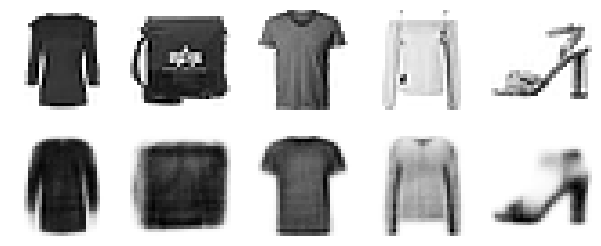

Saving figure vae_generated_images_plot
Saving figure semantic_interpolation_plot


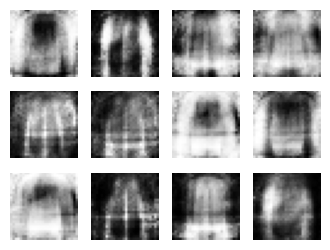

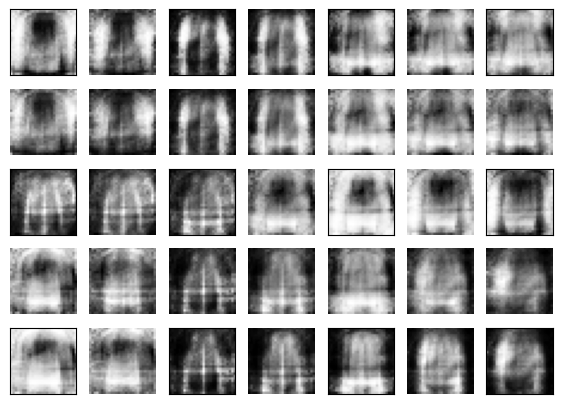

In [ ]:
tf.random.set_seed

(42)
np.random.seed(42)

codings_size = 10

piecewise_constant_fn = piecewise_constant([120, 18], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
_ = LatentLossLayer()([codings_mean, codings_log_var])

variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

# Latent loss is added within the LatentLossLayer
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=[rounded_accuracy])

history = variational_ae.fit(X_train, X_train, epochs=150, batch_size=256,
                             validation_data=(X_valid, X_valid),callbacks=[lr_scheduler])
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])[0]
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
show_reconstructions(variational_ae)
plt.show()
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
tf.random.set_seed(42)
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)
tf.random.set_seed(42)
np.random.seed(0)

codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
alpha=0.5

betha=1-alpha
losses=ScaledBinaryCrossentropy(0.2)

codings_size = 300
piecewise_constant_fn = piecewise_constant([120, 18], [1e-3, 1e-4])
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(500, activation="relu",)(z)
z = keras.layers.Dense(400, activation="relu")(z)
z=keras.layers.BatchNormalization()(z)
codings_mean = keras.layers.Dense(codings_size,kernel_constraint=tf.keras.constraints.NonNeg())(z)
codings_log_var = keras.layers.Dense(codings_size,kernel_constraint=tf.keras.constraints.NonNeg())(z)
codings = Sampling()([codings_mean, codings_log_var])


variational_encoder = keras.models.Model(inputs=[inputs], outputs=[codings])
_ = LatentLossLayer()([codings_mean, codings_log_var])

decoder_inputs = keras.layers.Input(shape=[codings_size])
#x = keras.layers.BatchNormalization()(decoder_inputs)
x = keras.layers.Dense(400, activation="relu",)(decoder_inputs)
x = keras.layers.Dense(500, activation="relu",)(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

variational_ae.compile(loss=losses, optimizer="adam", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=150, batch_size=256,
                             validation_data=(X_valid, X_valid),callbacks=[lr_scheduler])


Epoch 1/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0303 - rounded_accuracy: 0.8327 - val_loss: 0.0175 - val_rounded_accuracy: 0.9048 - learning_rate: 0.0010
Epoch 2/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0159 - rounded_accuracy: 0.9124 - val_loss: 0.0146 - val_rounded_accuracy: 0.9195 - learning_rate: 0.0010
Epoch 3/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0137 - rounded_accuracy: 0.9253 - val_loss: 0.0131 - val_rounded_accuracy: 0.9283 - learning_rate: 0.0010
Epoch 4/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0124 - rounded_accuracy: 0.9324 - val_loss: 0.0121 - val_rounded_accuracy: 0.9337 - learning_rate: 0.0010
Epoch 5/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0116 - rounded_accuracy: 0.9369 - val_loss: 0.0113 - val_rounded_accuracy: 0.9384 - learning_rate: 0.0010
Epoch 6/150
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - rounded_accuracy: 0.9405 - val_loss: 0.0109 - val_rounded_accuracy: 0.9410 - learnin

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


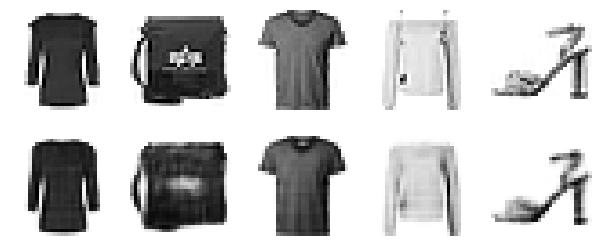

In [ ]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Se generan puntos en el espacio latente y se reconstruyen las imágenes:

Saving figure vae_generated_images_plot


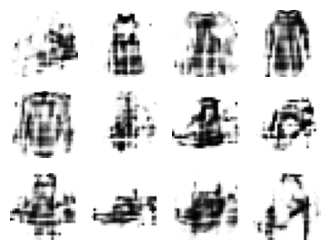

In [ ]:
tf.random.set_seed(49)
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
plot_multiple_images(images, 4)
save_fig("vae_generated_images_plot", tight_layout=False)

Interpolación semántica: se pasan las imágenes por el encoder, se interpolan los dos puntos en el espacio latente, y la interpolación en el espacio latente se pasa por el decoder.

In [ ]:
tf.random.set_seed(0)
np.random.seed(1)
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()
plt.figure(figsize=(7, 5))
for index, image in enumerate(images):
    plt.subplot(5, 7, index + 1)
    if index%7%2==0 and index//7%2==0:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    else:
        plt.axis("off")
    plt.imshow(image, cmap="binary")
save_fig("semantic_interpolation_plot", tight_layout=False)

# [Generative Adversarial Networks (GANs)](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

Variational autoencoders fueron y son muy populares, pero las GANs surgen como una alternativa para generar imágenes más realistas.

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape=[codings_size]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False # despues de compilar discriminator se entrena si se llama su .fit o su train_on_batch, no se  entrena en metodos de gan
gan.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

Epoch 1/1


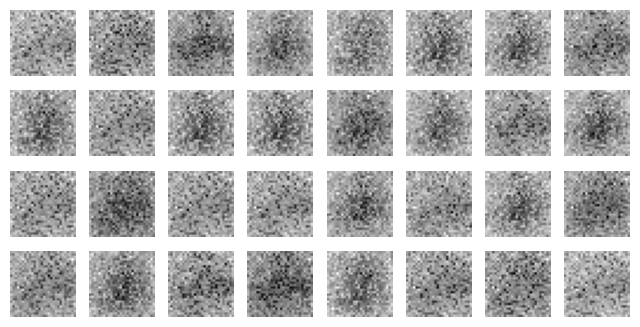

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

Saving figure gan_generated_images_plot


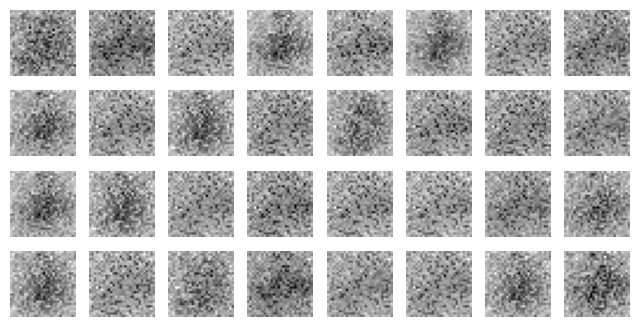

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("gan_generated_images_plot", tight_layout=False)

Epoch 1/5


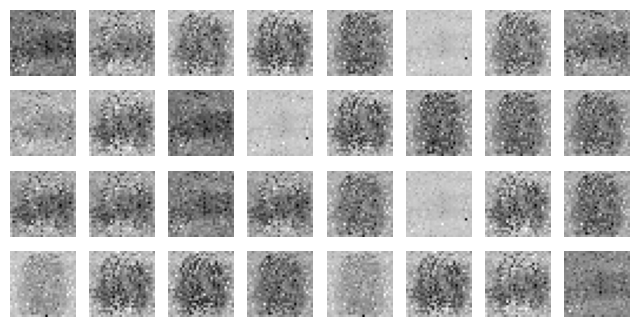

Epoch 2/5


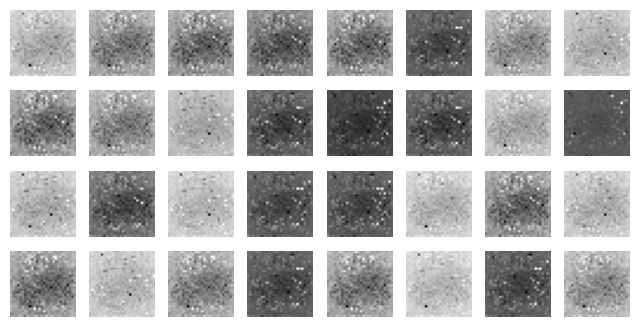

Epoch 3/5


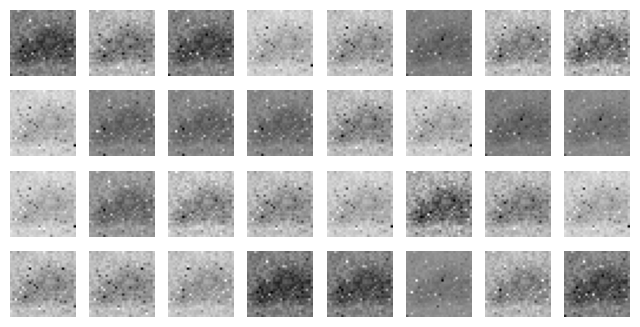

Epoch 4/5


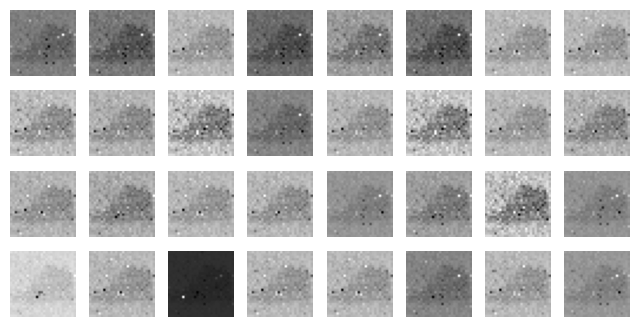

Epoch 5/5


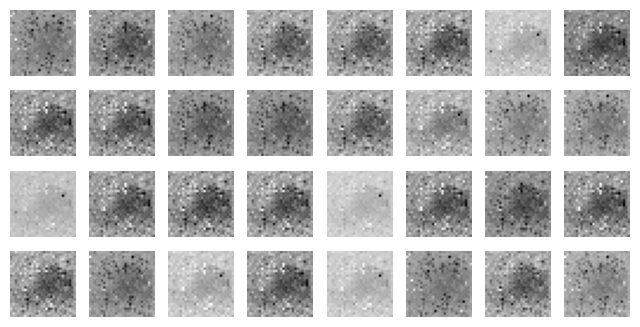

In [ ]:
train_gan(gan, dataset, batch_size, codings_size,n_epochs=5)


# Deep Convolutional GAN

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
save_fig("dcgan_generated_images_plot", tight_layout=False)